# Definitions for automated trading

## Equity Curve and Return Series

An equity curve is the traditing account value (Y) plotted against time (X). Otherwise, can be described as the cash at hand + equity value of portfolio asset (Y) against time (X). The goal is to get it to rise linearly with time without reinvestment of gains or rise exponentially with reinvested gains.

The *return series* is a list of returns to the account at each trading period. This doesn't depend on the gains.

## Characteristics of Equity Curve

In [20]:
%%latex
\begin{align}
P_{t_0}& : \text{dollar value of porfolio \textbf{before} adjustment.} \\
P_{t_1}& : \text{dollar value of porfolio \textbf{after} adjustment} \\
\text{for t} & = 0,1,2,\dots,T \ \ \text{where $t = 0$ represents beginning of simulation and $t = T$ represents current time}
\end{align}

<IPython.core.display.Latex object>

In [28]:
%%latex
We assume that portfolio adjustment occurs instantaenously in time. The change in $P$ from $t_0$ to $t_1$ represents change
due to adjustment, while change in $P$ from $(t-1)_1$ to $t_0$ is a change due to movement of market prices of assets 
in the portfolio.This is how $t$ evolves:
$$ t_0, t_1, (t+1)_0, (t+1)_1, (t+2)_1,\dots,T_0, T_1$$ 
with transition from $t_0$ to $t_1$ occuring instantaneously as the algorithm adjusts the portfolio

<IPython.core.display.Latex object>

Now define $C_0$ as the initial cash, $C_{t_0}$ and $C_{t_1}$ as uninvested cash at $t_0$ and $t_1$, and $K_{t}$ as trading costs incurred during instataneous adjustment from $t_0$ to $t_1$. The equity curve at time $t_0$ is equal to the following: $$ E_{t_{0}} = C_{t_0} + P_{t_0}= C_{0} + \sum_{i=1}^{t} \left \{ P_{i_0} - P_{(i-1)_{1}} - K_{i-1} \right \}$$
Note that $C_0 = C_{t_0}$ when $t = 0$. Further, the difference between $E_{t_1}$ and $E_{t_0}$ is the total trading costs incurred during the adjustment period from $t_0$ to $t_1$:
$$ E_{t_1} = E_{t_0} - K_t$$
Only the $E_{t_1}$ is plotted in the *equity curve* which reflects the impact of commission and other costs associated with adjustment from $t_0$ to $t_1$.

## Characteristics of Return Series

$V_t$: tradable capital at time $t_0$. This value is set by the trader. Total cash invested can't exceed $V_t$ at any time. Define $t(i_1)$ and $t(i_0)$ to be times $t_1$ and $t_0$ at which trade $i$ was initiated and exited, respectively. Trade $i$ is considered to be active at time $t$ if $t(i_1) \leq t_1 \lt t(i_0)$. $i \in I_t$ if $i$ is active at $t_1$. Define $j_i$ as asset initiated in trade $i$. Allow $P_{t_0}$ and $P_{t_1}$ to be subsettable by asset such tat $P_{t_1,j}$ represent the value of asset $j$ in the portfolio at time $t_1$.

If 5 trades were exectued, then there would be 5 new $i$'s subsettable to $t$ fo these transactions. Infinitely many overlapping trades can be made and be described as the previous notation.

The tradable capital must meet the following condition for all $t = 0,1,\dots,T$:
$$V_t \ge \sum_{i \in I_t} P_{t(i)_{1}),j_i}$$
$V_t$ would be determined during or prior to $(t-1)$ based on the information we have (e.g. current cash and gains from previous trades and market movement).

Verbally the above indicates that the sum of the initial purchase price of all active trades are less than or requal to the tradable capital. However, there is no restriction regarding the relationship between $V_t$ and $P_{t_1}$ and  $P_{t_0}$ because $P_{t_1}$ and  $P_{t_0}$ are current market value of the portfolio rather than the initial price. The definition of $V_t$ is defined as above such that:

- $V_t$ is determined algorithmically before adjustment period
- Return series penalized for allocating more capital than is invested.
- ALlow flexibility in tradable capital rather than enforce strict constancy or compounding

The equation for return series is as follows:
$$ R_t = \frac{P_{t_0} - P_{(t-1)_1} - K_{(t-1)}}{V_{t-1}}$$
This equation is different from the classical definition of return series: percentage change in equity curve from $(t-1)$ to $t$ which fails to take into account the following:

- If cash winthdrawals or deposits are made to the trading account after $t = 0$. Here the denominator (i.e. tradable capital) takes that into account with the new equation
- If earnings are not strictly reinvested. (Again the $V_(t-1)$ takes into account but also the commisions $(K_{(t-1)})$ takes into account the reinvested earnings-based commission/fee.


## Risk-Return Metrics

The idea is to maximize risk-adjusted return. The strategy would be to develop models by backtesting (or basically cross-validating and selecting parameters that best fit to get best prediction model).Many measures of risk-adjusted return can be selected as the outcome...

**High-Frequency Sharpe Ratio**: $Sharpe = \frac{\bar{R}}{\sigma_R}$, where $\bar{R} = \frac{R_1+,\dots,+R_T}{T}$ and $\sigma_R = \sqrt{\frac{1}{T-1} \sum (R_t - \bar{R})}$

There are others but will go over during coding :)

# Characteristics of Risk-Return Metrics

Equity curves will be simulated to study characteristics of risk-return metrics. This will help in determining which risk-return metric to focus on.
Generate equity curve using SPY returns and random numbers with constant tradable capital of \$10,000. For this exercise use only $E_{t_0}$

In [38]:
%load_ext rpy2.ipython

In [40]:
%R library(quantmod)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: xts

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: TTR

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Version 0.4-0 included new data defaults. See ?getSymbols.
Learn from a quantmo

array(['quantmod', 'TTR', 'xts', 'zoo', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

In [42]:
%%R 
options("getSymbols.warning4.0"=FALSE,
            "getSymbols.auto.assign"=FALSE)
# Load S&P 500 ETF data, stores closing prices as a vector
SPY <- suppressWarnings(
    getSymbols(c("SPY"), from = "2012-01-01"))
SPY <- as.numeric(SPY$SPY.Close)[1:987]

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).

  warnings.warn(x, RRuntimeWarning)


The data for SPY has been acquired and prepared. We can simulate the equity curve and study some of the characteristics of risk-return metrics. 

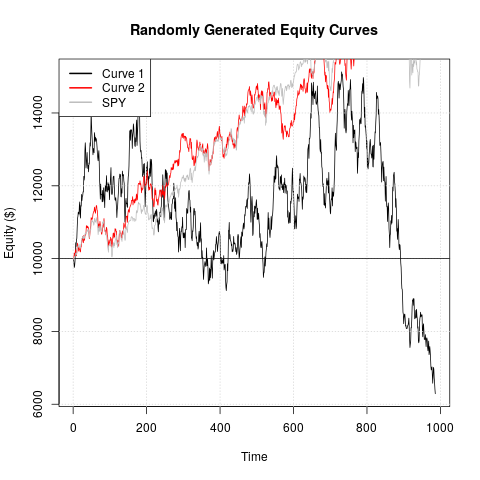

In [79]:
%%R
# Set seed


set.seed(1)
# Create time index
t <- 1:(length(SPY) - 1)
    
# Tradable capital vector
Vt <- c(rep(1e4, length(t)))

# Return Series
# benchmark return series
Rb <- rep(NA, length(t))

# Randomly Generate return series 1 and 2
Rt <- rep(NA, length(t))
Rt2 <- rep(NA, length(t))


# Equity Curves
# benchmark equity curve
Eb <- rep(NA, length(t))
Eb[1] <- Vt[1]

# Randomly Generate Equity CUrve 1 and 2 

Et <- rep(NA, length(t))
Et <- Vt[1]
Et2 <- rep(NA, length(t))
Et2 <- Vt[1]

for(i in 2:length(t)){
    
    # First simulate the Return serires 
    Rb[i] <- (SPY[i]/SPY[i-1]) - 1

    # Then simulate the equity curves
    Eb[i] <- Eb[i-1]*(1+Rb[i])
    
    
}

for(i in 2:length(t)){
    # First simulate the Return serires 
    Rt[i] <- Rb[i] + rnorm(n = 1, mean = 0.24/length(t), sd=2.5*sd(Rb,na.rm=TRUE))
    
    Rt2[i] <- Rb[i] + rnorm(n = 1, mean = 0.02/length(t), sd=0.75*sd(Rb,na.rm=TRUE))
    
    # Then simulate the equity curves
    Et[i] <- Et[i-1]*(1+Rt[i])
    
    Et2[i] <- Et2[i-1]*(1+Rt2[i])
}

plot(y = Et, x = t, type = "l", col = 1,
    xlab = "Time",
    ylab = "Equity ($)",
    main = "Randomly Generated Equity Curves")
grid()
abline(h = 1e4)
lines(y = Et2, x = t, col = 2)
lines(y = Eb, x = t, col = 8)
legend( x = "topleft", col = c(1,2,8), lwd = 2, legend = c("Curve 1", "Curve 2", "SPY"))

## Sharp Ratio

The high frequency sharp ratio only uses the $\bar{R}$ in the numerator instead of subtracting the $\bar{R} - R_j$ which is the risk free/benchmark return (i.e. the Excess return = Portfolio return - Benchmark return). This metric would be useful to those that are trading high frequency at least once a day or more.

In [81]:
%%R
# The equation again would be average excess return / sd return
# High frequency Sharp Ratio ignore the NA's
SR <- mean(Rt, na.rm=TRUE) / sd(Rt, na.rm = TRUE) 
SR2 <- mean(Rt2, na.rm=TRUE) / sd(Rt2, na.rm = TRUE) 
SRb <- mean(Rb, na.rm=TRUE) / sd(Rb, na.rm = TRUE) 

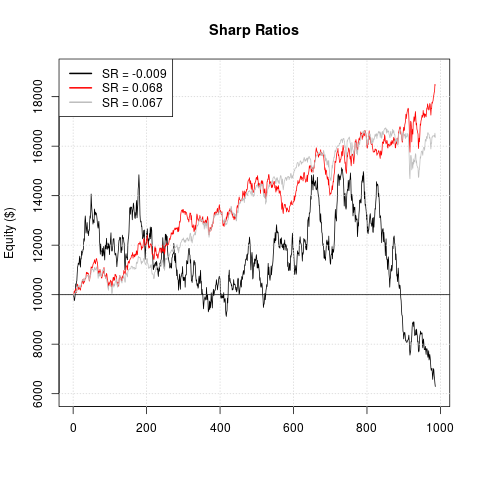

In [84]:
%%R
plot(y = Et, x =t , type = 'l', col = 1,
    xlab = "",
    ylab = "Equity ($)",
    main = "Sharp Ratios",
    ylim = c(6e3,1.9e4))
grid()
abline(h = 1e4)
lines(y = Et2, x = t, col =2)
lines(y = Eb, x = t, col = 8)
legend(x = "topleft", col = c(1,2,8), lwd = 2,
      legend = c(paste0("SR = ", round(SR, 3)),
                paste0("SR = ", round(SR2, 3)),
                paste0("SR = ", round(SRb, 3))))

We can see that the 1st simulated curve has the lowest overall return and Sharp ratio. The highest return (red) also has a high SR but similar SR is visible from the SYP index. Note Sharp Ratio:

- Penalizes for large losses and large gains (i.e. variance in the denominator)
- Since the formula exhibits similar statistical form to Z or T score, the returns are assumed to be normally distributed
- The denominator benchmarks against the mean return (as seen in the $\sigma_R$ equation) but the numerator standardizes against a completely separate benchmark (in this case 0 as high frequency doesn't benchmark against the standard). 

Now since I'm interested in Bitcoin and other cryptocurrency I will also look into that now.

In [93]:
%%R

# Load S&P 500 ETF data, stores closing prices as a vector
BTC <- suppressWarnings(
    getSymbols(c("BTC-USD"), from = "2012-01-01"))

BTC <- as.numeric(BTC[,4])[1:987] # 4th column is the closing column

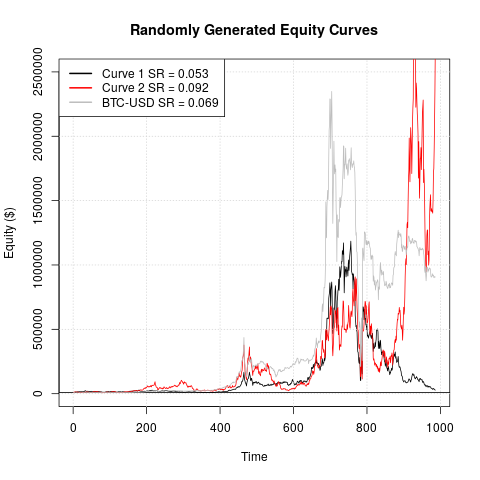

In [116]:
%%R

set.seed(1)
# Create time index
t <- 1:(length(BTC) - 1)
    
# Tradable capital vector
Vt <- c(rep(1e4, length(t)))

# Return Series
# benchmark return series
Rb <- rep(NA, length(t))

# Randomly Generate return series 1 and 2
Rt <- rep(NA, length(t))
Rt2 <- rep(NA, length(t))


# Equity Curves
# benchmark equity curve
Eb <- rep(NA, length(t))
Eb[1] <- Vt[1]

# Randomly Generate Equity CUrve 1 and 2 

Et <- rep(NA, length(t))
Et <- Vt[1]
Et2 <- rep(NA, length(t))
Et2 <- Vt[1]

for(i in 2:length(t)){
    
    # First simulate the Return serires 
    Rb[i] <- (BTC[i]/BTC[i-1]) - 1

    # Then simulate the equity curves
    Eb[i] <- Eb[i-1]*(1+Rb[i])
    
    
}

for(i in 2:length(t)){
    # First simulate the Return serires 
    Rt[i] <- Rb[i] + rnorm(n = 1, mean = 2/length(t), sd=0.5*sd(Rb,na.rm=TRUE))
    
    Rt2[i] <- Rb[i] + rnorm(n = 1, mean = 4/length(t), sd=0.75*sd(Rb,na.rm=TRUE))
    
    # Then simulate the equity curves
    Et[i] <- Et[i-1]*(1+Rt[i])
    
    Et2[i] <- Et2[i-1]*(1+Rt2[i])
}

SR <- mean(Rt, na.rm=TRUE) / sd(Rt, na.rm = TRUE) 
SR2 <- mean(Rt2, na.rm=TRUE) / sd(Rt2, na.rm = TRUE) 
SRb <- mean(Rb, na.rm=TRUE) / sd(Rb, na.rm = TRUE) 

plot(y = Et, x = t, type = "l", col = 1,
    xlab = "Time",
    ylab = "Equity ($)",
    main = "Randomly Generated Equity Curves",
    ylim = c(0, 2.5e6))
grid()
abline(h = 1e4)
lines(y = Et2, x = t, col = 2)
lines(y = Eb, x = t, col = 8)
legend( x = "topleft", col = c(1,2,8), lwd = 2, legend = c(paste0("Curve 1 SR = ",round(SR,3)),
                                                           paste0("Curve 2 SR = ",round(SR2,3)),
                                                           paste0("BTC-USD SR = ",round(SRb,3))))

We can see that based on the difference in the mean random value we add, the 2nd curve gets us the greatest return in addition to the highest SR. 

## Maximum Drawdown Ratios